In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline

In [22]:
df_cases = pd.read_csv('covid_19_india.csv')
df_cases.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [23]:
df = df_cases.copy()

In [24]:
df['Active'] = df['Confirmed']-(df['Cured']+df['Deaths'])
df[['Year', 'Month', 'Day']] = df['Date'].str.split('-', expand=True)

In [25]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [26]:
df = df[['Day', 'Month', 'Year', 'State/UnionTerritory', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed', 'Active']]
df.head()

,Day,Month,Year,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
0,30,01,2020,Kerala,1,0,0,0,1,1
1,31,01,2020,Kerala,1,0,0,0,1,1
2,01,02,2020,Kerala,2,0,0,0,2,2
3,02,02,2020,Kerala,3,0,0,0,3,3
4,03,02,2020,Kerala,3,0,0,0,3,3


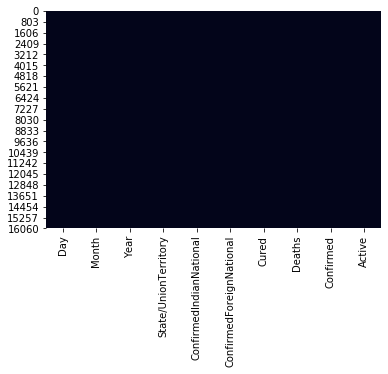

In [27]:
sns.heatmap(df.isnull(), cbar=False)

In [28]:
confirmed_by_states = df.groupby('State/UnionTerritory')['Confirmed'].sum()

In [29]:
active_by_states = df.groupby('State/UnionTerritory')['Active'].sum()

In [30]:
cured_by_states = df.groupby('State/UnionTerritory')['Cured'].sum()

In [31]:
deaths_by_states = df.groupby('State/UnionTerritory')['Deaths'].sum()

In [32]:
confirmed = pd.DataFrame(columns=['States', 'Confirmed'])
active = pd.DataFrame(columns=['States', 'Active'])
cured = pd.DataFrame(columns=['States', 'Cured'])
death = pd.DataFrame(columns=['States', 'Death'])
for f in confirmed_by_states.iteritems():
    first = pd.DataFrame({
        'States':[f[0]],
        'Confirmed':[f[1]]
    })
    confirmed = confirmed.append(first, ignore_index=True)
for s in active_by_states.iteritems():
    second = pd.DataFrame({
        'States':[s[0]],
        'Active':[s[1]]
    })
    active = active.append(second, ignore_index=True)
for t in cured_by_states.iteritems():
    third = pd.DataFrame({
        'States':[t[0]],
        'Cured':[t[1]]
    })
    cured = cured.append(third, ignore_index=True)
for o in deaths_by_states.iteritems():
    fourth = pd.DataFrame({
        'States':[o[0]],
        'Death':[o[1]]
    })
    death = death.append(fourth, ignore_index=True)
report = pd.merge(pd.merge(pd.merge(confirmed, active, on='States'), cured, on='States'),death, on='States')

In [33]:
report['Mortality Rate'] = (report['Death']/report['Confirmed'])*100
report

,States,Confirmed,Active,Cured,Death,Mortality Rate
0,Andaman and Nicobar Islands,1675248,62689,1589935,22624,1.35049
1,Andhra Pradesh,324146783,18243068,303427899,2475816,0.763795
2,Arunachal Pradesh,5598324,428502,5150519,19303,0.3448
3,Assam,80418492,5947569,74011348,459575,0.571479
4,Bihar,106881540,5993878,100131380,756282,0.707589
5,Bihar****,1430909,9560,1402468,18881,1.31951
6,Cases being reassigned to states,345565,345565,0,0,0
7,Chandigarh,8691806,592166,7980284,119356,1.3732
8,Chhattisgarh,128751782,9997112,117163544,1591126,1.23581
9,Dadra and Nagar Haveli,20722,362,20352,8,0.0386063


In [72]:
confirmed_by_year = df.groupby('Year')['Confirmed'].sum()
confirmed_by_year

Year
2020    1074022781
2021    3279455293
Name: Confirmed, dtype: int64

In [76]:
confirmed_by_month = df.groupby(['Year', 'Month'])['Confirmed'].sum()
confirmed_by_month

Year  Month
2020  01               2
      02              86
      03            9687
      04          422442
      05         2938234
      06        10558374
      07        31726501
      08        80749620
      09       149113758
      10       226770312
      11       264556412
      12       307177353
2021  01       326469747
      02       305631803
      03       356305616
      04       440660671
      05       751927486
      06       884673464
      07       213786506
Name: Confirmed, dtype: int64

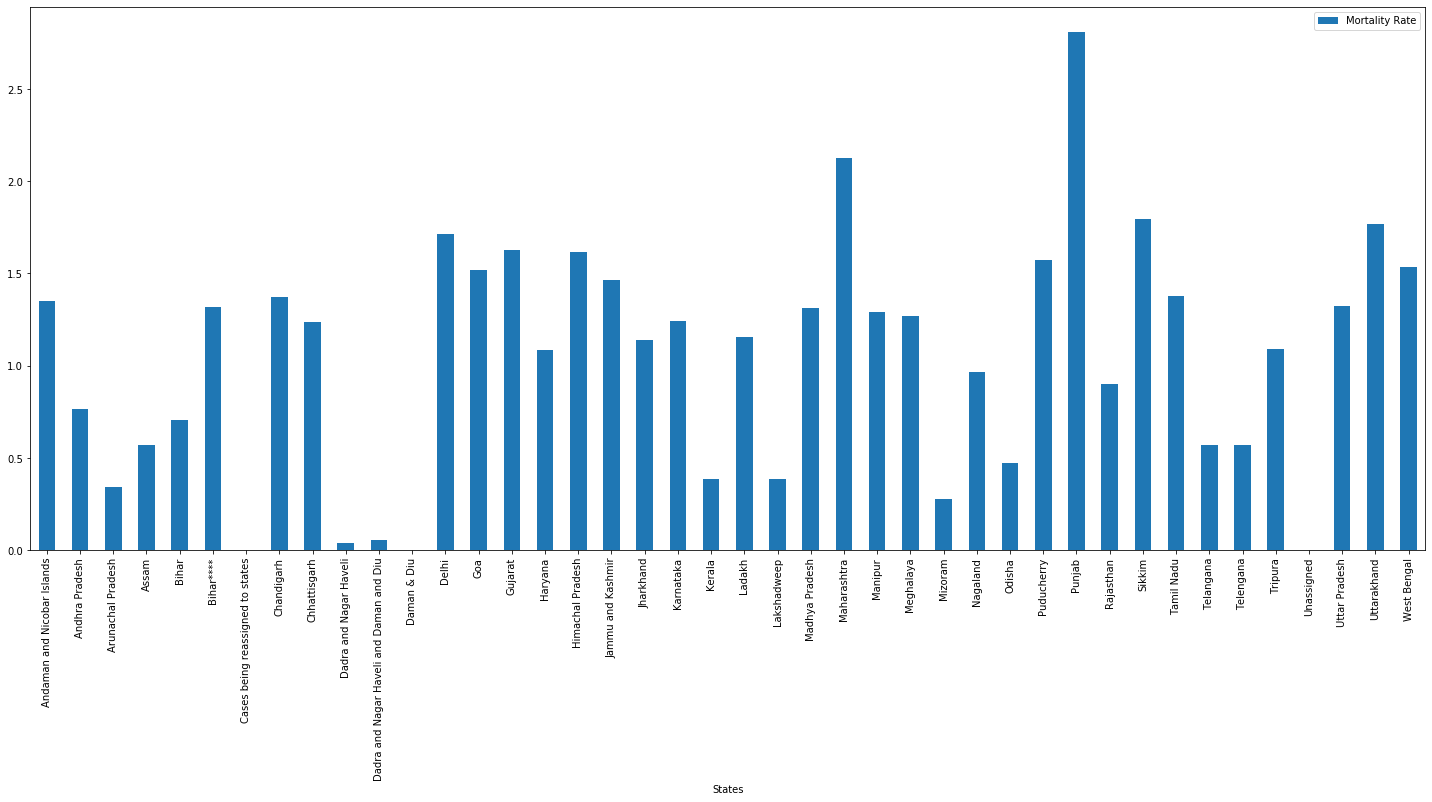

In [34]:
report.plot(x='States', y=['Mortality Rate'], kind='bar', figsize=(25,10))

In [35]:
top_deaths = report.sort_values('Mortality Rate', ascending=False)
top_deaths.head()

,States,Confirmed,Active,Cured,Death,Mortality Rate
31,Punjab,78999515,5674068,71108712,2216735,2.80601
24,Maharashtra,908892470,75789031,813788907,19314532,2.12506
33,Sikkim,2315519,290090,1983899,41530,1.79355
40,Uttarakhand,41179396,3766496,36684388,728512,1.76912
12,Delhi,236972842,8843231,224062704,4066907,1.71619


In [36]:
df_vaccine = pd.read_csv('covid_vaccine_statewise.csv')
df_vaccine.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [37]:
df_vaccine.shape

(6699, 18)

In [38]:
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 18 columns):
Updated On                             6699 non-null object
State                                  6699 non-null object
Total Doses Administered               6364 non-null float64
Total Sessions Conducted               6363 non-null float64
Total Sites                            6363 non-null float64
First Dose Administered                6363 non-null float64
Second Dose Administered               6363 non-null float64
Male(Individuals Vaccinated)           6363 non-null float64
Female(Individuals Vaccinated)         6363 non-null float64
Transgender(Individuals Vaccinated)    6363 non-null float64
Total Covaxin Administered             6363 non-null float64
Total CoviShield Administered          6363 non-null float64
Total Sputnik V Administered           1737 non-null float64
AEFI                                   4180 non-null float64
18-45 years (Age)                      41

In [39]:
df_vaccine.describe()

,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
count,6.364000e+03,6.363000e+03,6363.000000,6.363000e+03,6.363000e+03,6.363000e+03,6.363000e+03,6363.000000,6.363000e+03,6.363000e+03,1737.000000,4180.000000,4.177000e+03,4.178000e+03,4.178000e+03,6.363000e+03
mean,6.413310e+06,3.957716e+05,2360.343549,5.254151e+06,1.160167e+06,2.919990e+06,2.568098e+06,835.393368,6.928136e+05,5.707424e+06,2066.254462,1073.564833,1.955834e+06,3.275439e+06,2.887759e+06,5.265380e+06
std,2.615880e+07,1.656387e+06,7508.979436,2.132565e+07,4.882363e+06,1.225694e+07,1.064744e+07,3737.993697,2.991176e+06,2.319046e+07,9614.132634,3246.612821,8.448696e+06,1.095290e+07,9.204842e+06,2.132828e+07
min,0.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,0.000000,0.000000,1.059000e+03,1.136000e+03,5.580000e+02,7.000000e+00
25%,9.749425e+04,4.498000e+03,70.500000,8.277550e+04,6.405500e+03,4.299600e+04,3.760850e+04,4.000000,0.000000e+00,9.561450e+04,0.000000,94.000000,6.454900e+04,1.017950e+05,6.404975e+04,8.277550e+04
50%,5.369145e+05,2.588400e+04,616.000000,4.589680e+05,7.715800e+04,2.581390e+05,2.392390e+05,69.000000,4.760000e+03,4.989140e+05,0.000000,283.000000,3.382580e+05,9.198940e+05,8.211470e+05,4.705490e+05
75%,4.872305e+06,2.613895e+05,1790.000000,4.119336e+06,7.264175e+05,2.203892e+06,1.961909e+06,562.000000,4.669140e+05,4.258910e+06,79.000000,716.000000,1.068349e+06,2.727498e+06,2.533357e+06,4.119336e+06
max,3.561929e+08,3.501031e+07,73933.000000,2.901329e+08,6.606008e+07,1.911604e+08,1.649711e+08,61451.000000,4.401880e+07,3.120454e+08,128733.000000,23960.000000,1.361586e+08,1.229163e+08,9.711800e+07,2.901329e+08


In [40]:
df1 = df_vaccine.copy()
df1.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [41]:
df1['Total Covaxin Administered'] = (df1['Total Covaxin Administered']/df1['Total Doses Administered'])*100
df1['Total CoviShield Administered'] = (df1['Total CoviShield Administered']/df1['Total Doses Administered'])*100
df1['Total Sputnik V Administered'] = (df1['Total Sputnik V Administered']/df1['Total Doses Administered'])*100
df1['Male(Individuals Vaccinated)'] = (df1['Male(Individuals Vaccinated)']/df1['Total Individuals Vaccinated'])*100
df1['Female(Individuals Vaccinated)'] = (df1['Female(Individuals Vaccinated)']/df1['Total Individuals Vaccinated'])*100
df1['Transgender(Individuals Vaccinated)'] = (df1['Transgender(Individuals Vaccinated)']/df1['Total Individuals Vaccinated'])*100
df1['18-45 years (Age)'] = (df1['18-45 years (Age)']/df1['Total Individuals Vaccinated'])*100
df1['45-60 years (Age)'] = (df1['45-60 years (Age)']/df1['Total Individuals Vaccinated'])*100
df1['60+ years (Age)'] = (df1['60+ years (Age)']/df1['Total Individuals Vaccinated'])*100

In [42]:
df1.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,49.210788,50.785069,0.004143,1.199354,98.800646,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,46.665757,53.327418,0.006825,1.083544,98.916456,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41.590162,58.404811,0.005028,1.306197,98.693803,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,41.887738,58.106636,0.005626,1.543025,98.456975,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,39.044492,60.945957,0.009551,1.570360,98.429640,NaN,NaN,NaN,NaN,NaN,251280.0


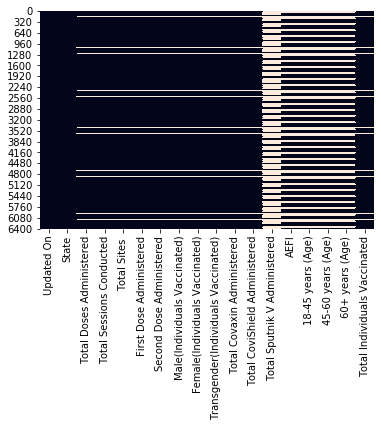

In [43]:
sns.heatmap(df1.isnull(), cbar=False)

In [44]:
df1 = df1.fillna(0)
df1.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,49.210788,50.785069,0.004143,1.199354,98.800646,0.0,0.0,0.0,0.0,0.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,46.665757,53.327418,0.006825,1.083544,98.916456,0.0,0.0,0.0,0.0,0.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41.590162,58.404811,0.005028,1.306197,98.693803,0.0,0.0,0.0,0.0,0.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,41.887738,58.106636,0.005626,1.543025,98.456975,0.0,0.0,0.0,0.0,0.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,39.044492,60.945957,0.009551,1.570360,98.429640,0.0,0.0,0.0,0.0,0.0,251280.0


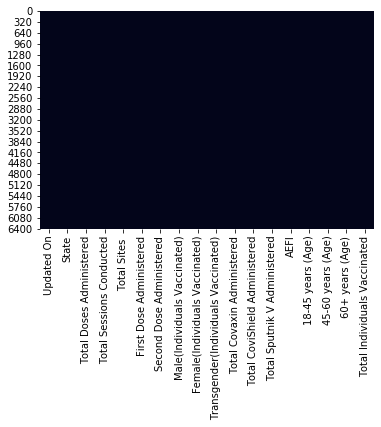

In [45]:
sns.heatmap(df1.isnull(), cbar=False)

In [46]:
df1['Updated On'] = pd.to_datetime(df1['Updated On'])

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 18 columns):
Updated On                             6699 non-null datetime64[ns]
State                                  6699 non-null object
Total Doses Administered               6699 non-null float64
Total Sessions Conducted               6699 non-null float64
Total Sites                            6699 non-null float64
First Dose Administered                6699 non-null float64
Second Dose Administered               6699 non-null float64
Male(Individuals Vaccinated)           6699 non-null float64
Female(Individuals Vaccinated)         6699 non-null float64
Transgender(Individuals Vaccinated)    6699 non-null float64
Total Covaxin Administered             6699 non-null float64
Total CoviShield Administered          6699 non-null float64
Total Sputnik V Administered           6699 non-null float64
AEFI                                   6699 non-null float64
18-45 years (Age)                

In [48]:
first_date = df1['Updated On'].min()
last_date = df1['Updated On'].max()
print('First date available on the dataframe: ', first_date)
print('Last date available on the dataframe: ', last_date)

First date available on the dataframe:  2021-01-02 00:00:00
Last date available on the dataframe:  2021-12-07 00:00:00


In [49]:
df1.iloc[(df1['Second Dose Administered'].values != 0).argmax()]

Updated On                             2021-02-13 00:00:00
State                                                India
Total Doses Administered                       7.70821e+06
Total Sessions Conducted                            216559
Total Sites                                          41308
First Dose Administered                        7.68735e+06
Second Dose Administered                             20859
Male(Individuals Vaccinated)                       47.9236
Female(Individuals Vaccinated)                     52.0632
Transgender(Individuals Vaccinated)              0.0132685
Total Covaxin Administered                          10.136
Total CoviShield Administered                      89.5934
Total Sputnik V Administered                             0
AEFI                                                     0
18-45 years (Age)                                        0
45-60 years (Age)                                        0
60+ years (Age)                                         

In [50]:
vaccinated_per_state = ((df1.groupby('State')['Total Individuals Vaccinated'].sum())/12000000000)*100
vaccinated_per_state

State
Andaman and Nicobar Islands                   0.082856
Andhra Pradesh                                5.966953
Arunachal Pradesh                             0.226732
Assam                                         2.595923
Bihar                                         6.916708
Chandigarh                                    0.208604
Chhattisgarh                                  4.309286
Dadra and Nagar Haveli and Daman and Diu      0.133410
Delhi                                         3.157352
Goa                                           0.349015
Gujarat                                      11.001440
Haryana                                       3.782973
Himachal Pradesh                              1.579571
India                                       139.623141
Jammu and Kashmir                             2.085405
Jharkhand                                     2.992052
Karnataka                                     9.140470
Kerala                                        6.261675
Lada

In [51]:
vaccine_administered_per_state = ((df1.groupby('State')['Total Doses Administered'].sum())/12000000000)*100
vaccine_administered_per_state

State
Andaman and Nicobar Islands                   0.094408
Andhra Pradesh                                7.601473
Arunachal Pradesh                             0.282629
Assam                                         3.195252
Bihar                                         8.182099
Chandigarh                                    0.258527
Chhattisgarh                                  5.124903
Dadra and Nagar Haveli and Daman and Diu      0.152168
Delhi                                         4.033703
Goa                                           0.417095
Gujarat                                      13.881999
Haryana                                       4.467813
Himachal Pradesh                              1.873471
India                                       170.084438
Jammu and Kashmir                             2.479940
Jharkhand                                     3.545902
Karnataka                                    11.023103
Kerala                                        7.783752
Lada

In [52]:
vaccine_wasted = vaccine_administered_per_state - vaccinated_per_state
vaccine_wasted

State
Andaman and Nicobar Islands                  0.011552
Andhra Pradesh                               1.634520
Arunachal Pradesh                            0.055897
Assam                                        0.599330
Bihar                                        1.265392
Chandigarh                                   0.049923
Chhattisgarh                                 0.815618
Dadra and Nagar Haveli and Daman and Diu     0.018758
Delhi                                        0.876351
Goa                                          0.068079
Gujarat                                      2.880559
Haryana                                      0.684840
Himachal Pradesh                             0.293900
India                                       30.461296
Jammu and Kashmir                            0.394535
Jharkhand                                    0.553850
Karnataka                                    1.882633
Kerala                                       1.522077
Ladakh                

In [53]:
male_vaccinated = df1.groupby('State')['Male(Individuals Vaccinated)'].mean()
female_vaccinated = df1.groupby('State')['Female(Individuals Vaccinated)'].mean()

In [54]:
males_vaccinated = pd.DataFrame(columns=['State', 'Males'])
females_vaccinated = pd.DataFrame(columns=['State', 'Females'])
for items1 in male_vaccinated.iteritems():
    vacc1 = pd.DataFrame({
        'State':[items1[0]],
        'Males':[items1[1]]
    })
    males_vaccinated = males_vaccinated.append(vacc1, ignore_index=True)
    
for items2 in female_vaccinated.iteritems():
    vacc2 = pd.DataFrame({
        'State':[items2[0]],
        'Females':[items2[1]]
    })
    females_vaccinated = females_vaccinated.append(vacc2, ignore_index=True)
gender_vaccinated = pd.merge(males_vaccinated, females_vaccinated, on=['State'])
gender_vaccinated

,State,Males,Females
0,Andaman and Nicobar Islands,49.322908,46.638471
1,Andhra Pradesh,45.464614,51.188723
2,Arunachal Pradesh,48.898075,47.228198
3,Assam,47.674947,48.719699
4,Bihar,45.068922,51.011632
5,Chandigarh,57.891154,38.474344
6,Chhattisgarh,44.152006,52.387555
7,Dadra and Nagar Haveli and Daman and Diu,53.623758,41.545594
8,Delhi,58.728803,38.260332
9,Goa,47.314326,48.686116


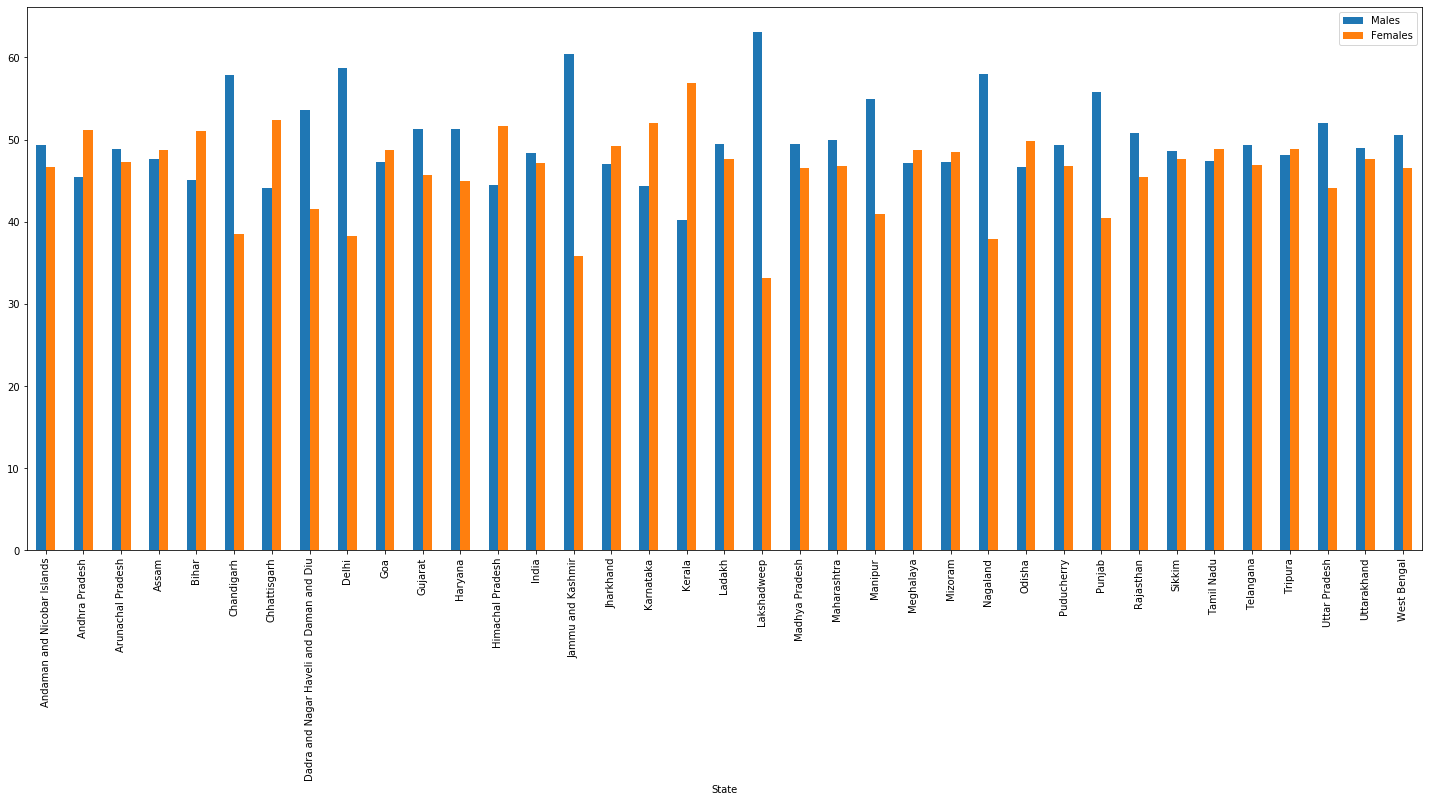

In [55]:
gender_vaccinated.plot(x='State', y=['Males', 'Females'], kind='bar', figsize=(25,10))

In [56]:
top_male_vaccinated_states = gender_vaccinated.sort_values('Males', ascending=False)
top_male_vaccinated_states.head()

,State,Males,Females
19,Lakshadweep,63.033534,33.138637
14,Jammu and Kashmir,60.408819,35.795983
8,Delhi,58.728803,38.260332
25,Nagaland,58.032270,37.912948
5,Chandigarh,57.891154,38.474344


In [57]:
top_female_vaccinated_states = gender_vaccinated.sort_values('Females', ascending=False)
top_female_vaccinated_states.head()

,State,Males,Females
17,Kerala,40.154771,56.884981
6,Chhattisgarh,44.152006,52.387555
16,Karnataka,44.395524,51.950375
12,Himachal Pradesh,44.451942,51.683208
1,Andhra Pradesh,45.464614,51.188723


In [58]:
query_states = gender_vaccinated.query('Females>Males')
query_states

,State,Males,Females
1,Andhra Pradesh,45.464614,51.188723
3,Assam,47.674947,48.719699
4,Bihar,45.068922,51.011632
6,Chhattisgarh,44.152006,52.387555
9,Goa,47.314326,48.686116
12,Himachal Pradesh,44.451942,51.683208
15,Jharkhand,47.044937,49.207130
16,Karnataka,44.395524,51.950375
17,Kerala,40.154771,56.884981
23,Meghalaya,47.122489,48.753777


In [59]:
vaccinated_last = df1.groupby('State')['18-45 years (Age)'].mean()
vaccinated_second = df1.groupby('State')['45-60 years (Age)'].mean()
vaccinated_first = df1.groupby('State')['60+ years (Age)'].mean()

In [60]:
vaccinated_children = pd.DataFrame(columns=['State', 'Children'])
vaccinated_adults = pd.DataFrame(columns=['State', 'Adults'])
vaccinated_olds = pd.DataFrame(columns=['State', 'Old_People'])
for items3 in vaccinated_last.iteritems():
    vacc3 = pd.DataFrame({
        'State':[items3[0]],
        'Children':[items3[1]]
    })
    vaccinated_children = vaccinated_children.append(vacc3, ignore_index=True)
for items2 in vaccinated_second.iteritems():
    vacc2 = pd.DataFrame({
        'State':[items2[0]],
        'Adults':[items2[1]]
    })
    vaccinated_adults = vaccinated_adults.append(vacc2, ignore_index=True)
for items1 in vaccinated_first.iteritems():
    vacc1 = pd.DataFrame({
        'State':[items1[0]],
        'Old_People':[items1[1]]
    })
    vaccinated_olds = vaccinated_olds.append(vacc1, ignore_index=True)
vaccinated_age = pd.merge(pd.merge(vaccinated_children, vaccinated_adults, on='State'), vaccinated_olds, on='State')
vaccinated_age

,State,Children,Adults,Old_People
0,Andaman and Nicobar Islands,12.965881,33.346858,17.053043
1,Andhra Pradesh,13.264648,28.429017,22.360384
2,Arunachal Pradesh,24.157407,27.973300,11.413854
3,Assam,16.994784,29.656116,17.155714
4,Bihar,14.200313,21.990912,27.300196
5,Chandigarh,17.283885,25.145162,21.333464
6,Chhattisgarh,8.835615,32.235230,22.874903
7,Dadra and Nagar Haveli and Daman and Diu,23.354101,25.018563,13.082184
8,Delhi,19.662846,25.449099,19.278040
9,Goa,14.552619,23.220946,25.629524


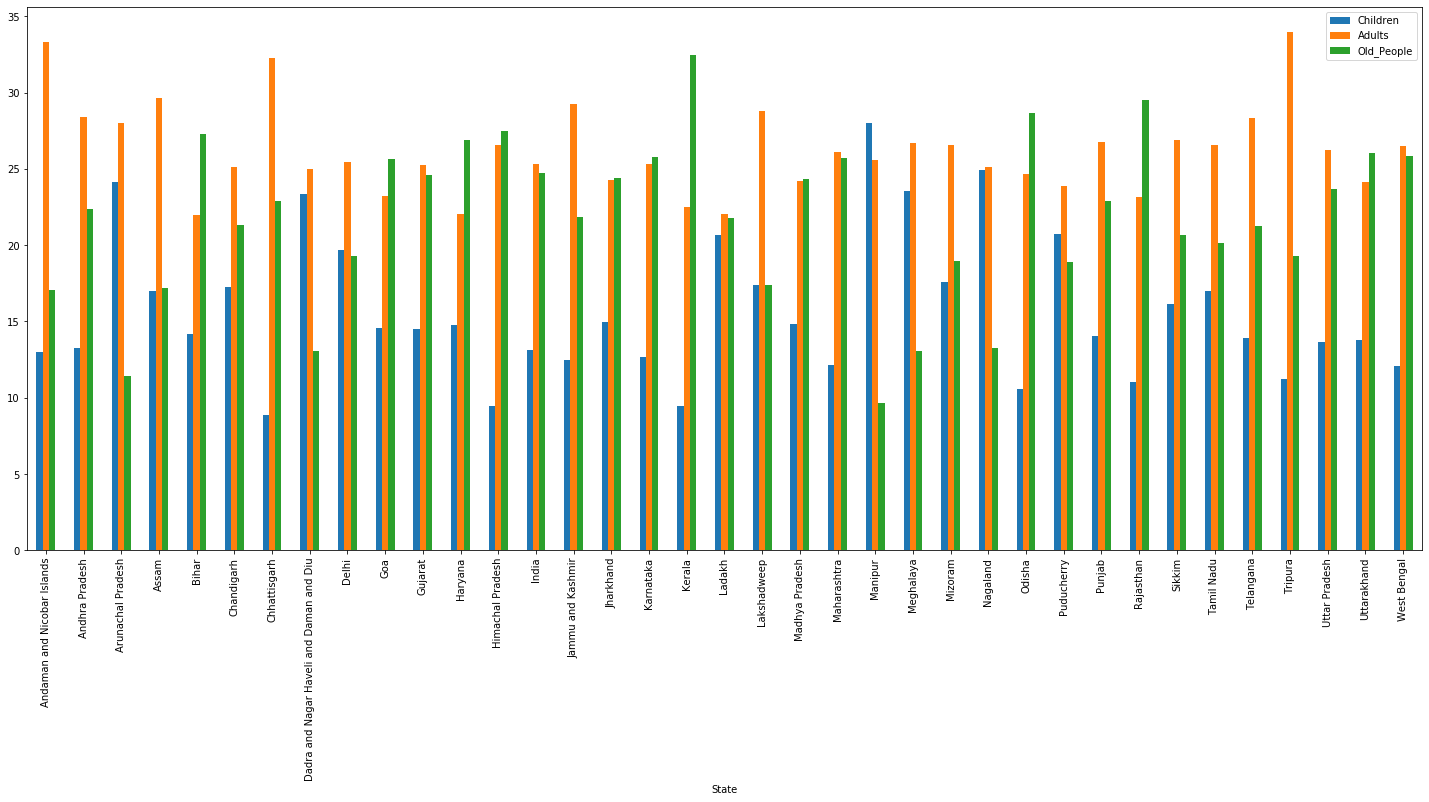

In [61]:
vaccinated_age.plot(x='State', y=['Children', 'Adults', 'Old_People'], kind='bar', figsize=(25,10))

In [62]:
old_age_query_states = vaccinated_age.query('Children < Old_People > Adults')
old_age_query_states

,State,Children,Adults,Old_People
4,Bihar,14.200313,21.990912,27.300196
9,Goa,14.552619,23.220946,25.629524
11,Haryana,14.743918,22.026324,26.887171
12,Himachal Pradesh,9.461533,26.580434,27.498649
15,Jharkhand,14.977859,24.246291,24.425548
16,Karnataka,12.638255,25.322088,25.780020
17,Kerala,9.480592,22.480404,32.470524
20,Madhya Pradesh,14.825893,24.216209,24.326779
26,Odisha,10.565650,24.668699,28.644619
29,Rajasthan,11.048092,23.157262,29.501142


In [63]:
adult_query_states = vaccinated_age.query('Children < Adults > Old_People')
adult_query_states

,State,Children,Adults,Old_People
0,Andaman and Nicobar Islands,12.965881,33.346858,17.053043
1,Andhra Pradesh,13.264648,28.429017,22.360384
2,Arunachal Pradesh,24.157407,27.973300,11.413854
3,Assam,16.994784,29.656116,17.155714
5,Chandigarh,17.283885,25.145162,21.333464
6,Chhattisgarh,8.835615,32.235230,22.874903
7,Dadra and Nagar Haveli and Daman and Diu,23.354101,25.018563,13.082184
8,Delhi,19.662846,25.449099,19.278040
10,Gujarat,14.479762,25.229474,24.571555
13,India,13.116726,25.311721,24.718540


In [64]:
child_query_states = vaccinated_age.query('Adults < Children > Old_People')
child_query_states

,State,Children,Adults,Old_People
22,Manipur,28.022722,25.565206,9.656509


In [65]:
covaxin = df1.groupby('State')['Total Covaxin Administered'].mean()
covishield = df1.groupby('State')['Total CoviShield Administered'].mean()
sputnik = df1.groupby('State')['Total Sputnik V Administered'].mean()

In [66]:
covaxin_by_state = pd.DataFrame(columns=['State', 'Total Covaxin Administered'])
covishield_by_state = pd.DataFrame(columns=['State', 'Total Covishield Administered'])
sputnik_by_state = pd.DataFrame(columns=['State', 'Total Sputnik V Administered'])
for items3 in covaxin.iteritems():
    vacc3 = pd.DataFrame({
        'State':[items3[0]],
        'Total Covaxin Administered':[items3[1]]
    })
    covaxin_by_state = covaxin_by_state.append(vacc3, ignore_index=True)
for items2 in covishield.iteritems():
    vacc2 = pd.DataFrame({
        'State':[items2[0]],
        'Total Covishield Administered':[items2[1]]
    })
    covishield_by_state = covishield_by_state.append(vacc2, ignore_index=True)
for items1 in sputnik.iteritems():
    vacc1 = pd.DataFrame({
        'State':[items1[0]],
        'Total Sputnik V Administered':[items1[1]]
    })
    sputnik_by_state = sputnik_by_state.append(vacc1, ignore_index=True)
vaccine_by_state = pd.merge(pd.merge(covaxin_by_state, covishield_by_state, on='State'), sputnik_by_state, on='State')
vaccine_by_state

,State,Total Covaxin Administered,Total Covishield Administered,Total Sputnik V Administered
0,Andaman and Nicobar Islands,0.000000,92.773990,0.000000
1,Andhra Pradesh,13.216266,79.602411,0.008878
2,Arunachal Pradesh,0.035757,92.726172,0.000000
3,Assam,14.052416,79.802638,0.000096
4,Bihar,5.414931,88.176231,0.000170
5,Chandigarh,0.041796,94.045924,0.000000
6,Chhattisgarh,1.663423,92.071571,0.000210
7,Dadra and Nagar Haveli and Daman and Diu,0.000312,93.501428,0.000000
8,Delhi,21.721014,72.248148,0.004025
9,Goa,0.497532,93.288843,0.000000


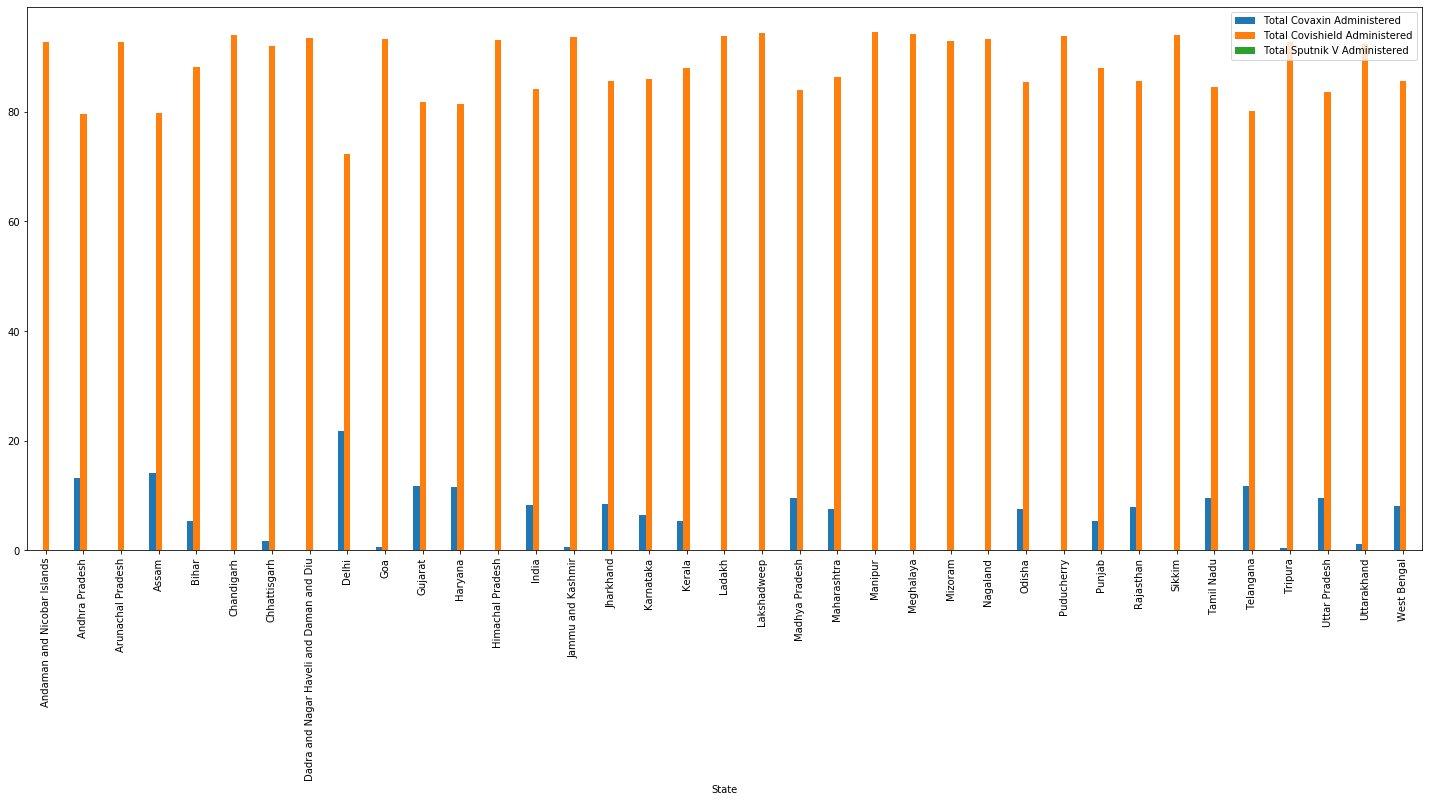

In [67]:
vaccine_by_state.plot(x='State', y=['Total Covaxin Administered', 'Total Covishield Administered', 'Total Sputnik V Administered'], kind='bar', figsize=(25,10))